## Observations and Insights 

# Observation #1

Looking at the drug regimen and their total timepoints recorded on the bar graphs below, one could suggest that the more timepoints recorded the longer the mice lived during that regimen and vise versa. Further analysis would be required to confirm this hypothesis.

# Observation #2

Based on whisker box plot below, only one outlier was found in the "Infubinol" category. One may want to remove this point and rerun the analysis to better predict the effectiveness of the "Infubinol" regimen.

# Observation #3

Looking at the mouse s185 line graph below, one could suggest that the "Capomulin" treatment was successful in reducing the size of the tumor over the studied time period. Futher analysis would be required to confirm this hypothesis, but at first glance it looks promising and would be worthy of further investigation.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice_id = mouse_study_results["Mouse ID"].unique()

print(f"Unique mice Ids: {unique_mice_id}")

print(f"Total number of unique mice: {len(unique_mice_id)}")

Unique mice Ids: ['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l7

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = mouse_study_results[mouse_study_results.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False) == True]

duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results = mouse_study_results[mouse_study_results["Mouse ID"] != "g989"]

mouse_study_results = mouse_study_results.reset_index()
mouse_study_results["index"] = mouse_study_results.index
mouse_study_results

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
print(f"Total number of unique mice Ids: {len(mouse_study_results['Mouse ID'].unique())}")

Total number of unique mice Ids: 248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gb = mouse_study_results.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_tumor_stats = regimen_gb.describe()["Tumor Volume (mm3)"]

regimen_tumor_stats_mean = regimen_tumor_stats["mean"]

regimen_tumor_stats_median = regimen_tumor_stats["50%"]

regimen_tumor_stats_std = regimen_tumor_stats["std"]

regimen_tumor_stats_var = regimen_tumor_stats_std ** 2

regimen_tumor_stats_sem = regimen_gb.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

regimen_tumor_summary_df = pd.concat([regimen_tumor_stats_mean, regimen_tumor_stats_median,\
                                   regimen_tumor_stats_var, regimen_tumor_stats_std,\
                                   regimen_tumor_stats_sem], axis = 1)

regimen_tumor_summary_df.columns = ["mean", "median", "var", "std", "sem"]

regimen_tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# using the aggregation method, produce the same summary statistics in a single line
regimen_tumor_summary_agg_df = regimen_gb["Tumor Volume (mm3)"].agg(["mean", np.median, "var", "std", "sem"])

regimen_tumor_summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

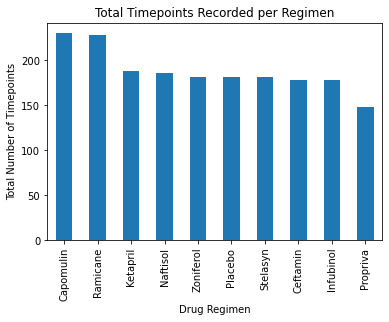

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_vs_timepoints = regimen_gb["Timepoint"].count().sort_values(ascending = False)
regimen_vs_timepoints_ax = regimen_vs_timepoints.plot.bar(xlabel = "Drug Regimen",\
                                                         ylabel = "Total Number of Timepoints",\
                                                         title = "Total Timepoints Recorded per Regimen")



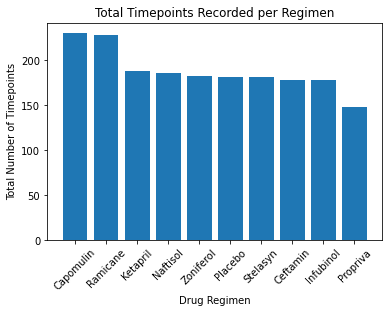

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regimen_vs_timepoints.index.values, regimen_vs_timepoints, align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.title("Total Timepoints Recorded per Regimen")
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:title={'center':'Female vs Male'}, ylabel='Sex'>

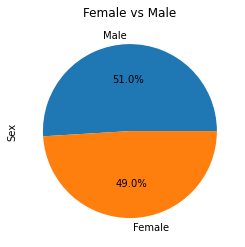

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male_ax = mouse_study_results["Sex"].value_counts().plot.pie(autopct = "%1.1f%%", title = "Female vs Male")
female_vs_male_ax


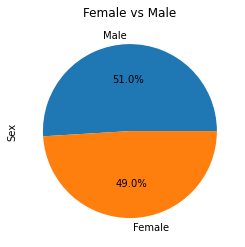

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_results["Sex"].value_counts(), labels = mouse_study_results["Sex"].unique(),\
       autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.title("Female vs Male")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_gb = mouse_study_results.groupby("Mouse ID")

max_timepoint_index = mouse_id_gb.max()["index"]

mouse_max_timepoint_df = mouse_study_results.loc[max_timepoint_index]

mouse_max_timepoint_df = mouse_max_timepoint_df.reset_index()

mouse_max_timepoint_df = mouse_max_timepoint_df.drop(columns = ["level_0"])

mouse_max_timepoint_df


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,483,a262,Placebo,Female,17,29,45,70.717621,4
3,493,a275,Ceftamin,Female,20,28,45,62.999356,3
4,500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,1849,z435,Propriva,Female,12,26,10,48.710661,0
244,84,z578,Ramicane,Male,11,16,45,30.638696,0
245,1859,z581,Infubinol,Female,24,25,45,62.754451,3
246,1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[], [], [], []]

# Populate tumor_vol_data
mouse_max_timepoint_df.loc[0,"Drug Regimen"]

for i in range(0, len(mouse_max_timepoint_df)):
    
    if (mouse_max_timepoint_df.loc[i, "Drug Regimen"] == "Capomulin"):
        
        tumor_vol_data[0].append(mouse_max_timepoint_df.loc[i, "Tumor Volume (mm3)"])
        
    elif (mouse_max_timepoint_df.loc[i, "Drug Regimen"] == "Ramicane"):
        
        tumor_vol_data[1].append(mouse_max_timepoint_df.loc[i, "Tumor Volume (mm3)"])
        
    elif (mouse_max_timepoint_df.loc[i, "Drug Regimen"] == "Infubinol"):
        
        tumor_vol_data[2].append(mouse_max_timepoint_df.loc[i, "Tumor Volume (mm3)"])
        
    elif (mouse_max_timepoint_df.loc[i, "Drug Regimen"] == "Ceftamin"):
        
        tumor_vol_data[3].append(mouse_max_timepoint_df.loc[i, "Tumor Volume (mm3)"])
        
# Create a dataframe of treatment regimens and their last tumor volumes
regimen_tumor_dict = {treatments_list[0] : tumor_vol_data[0], treatments_list[1] : tumor_vol_data[1],\
                   treatments_list[2] : tumor_vol_data[2], treatments_list[3] : tumor_vol_data[3]}

regimen_tumor_df = pd.DataFrame(regimen_tumor_dict)
regimen_tumor_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Calculate the lower, upper, and inter-quartiles of Capomulin, Ramicane, Infubinol, and Ceftamin.
capo_qaurtiles = regimen_tumor_df["Capomulin"].quantile([0.25, 0.5, 0.75])
capo_lowerq = capo_qaurtiles[0.25]
capo_upperq = capo_qaurtiles[0.75]
capo_iqr = capo_upperq - capo_lowerq

rami_qaurtiles = regimen_tumor_df["Ramicane"].quantile([0.25, 0.5, 0.75])
rami_lowerq = rami_qaurtiles[0.25]
rami_upperq = rami_qaurtiles[0.75]
rami_iqr = rami_upperq - rami_lowerq

infu_qaurtiles = regimen_tumor_df["Infubinol"].quantile([0.25, 0.5, 0.75])
infu_lowerq = infu_qaurtiles[0.25]
infu_upperq = infu_qaurtiles[0.75]
infu_iqr = infu_upperq - infu_lowerq

ceft_qaurtiles = regimen_tumor_df["Ceftamin"].quantile([0.25, 0.5, 0.75])
ceft_lowerq = ceft_qaurtiles[0.25]
ceft_upperq = ceft_qaurtiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
        
# Determine outliers using upper and lower bounds
capo_outliers = regimen_tumor_df["Capomulin"]
capo_outliers = capo_outliers[(capo_outliers < (capo_lowerq - (1.5 * capo_iqr)))\
                             | (capo_outliers > (capo_upperq + (1.5 * capo_iqr)))]

print(f"Number of {treatments_list[0]} potential outliers: {len(capo_outliers)}")

rami_outliers = regimen_tumor_df["Ramicane"]
rami_outliers = rami_outliers[(rami_outliers < (rami_lowerq - (1.5 * rami_iqr)))\
                             | (rami_outliers > (rami_upperq + (1.5 * rami_iqr)))]

print(f"Number of {treatments_list[1]} potential outliers: {len(rami_outliers)}")

infu_outliers = regimen_tumor_df["Infubinol"]
infu_outliers = infu_outliers[(infu_outliers < (infu_lowerq - (1.5 * infu_iqr)))\
                             | (infu_outliers > (infu_upperq + (1.5 * infu_iqr)))]

print(f"Number of {treatments_list[2]} potential outliers: {len(infu_outliers)}")

ceft_outliers = regimen_tumor_df["Ceftamin"]
ceft_outliers = ceft_outliers[(ceft_outliers < (ceft_lowerq - (1.5 * ceft_iqr)))\
                             | (ceft_outliers > (ceft_upperq + (1.5 * ceft_iqr)))]

print(f"Number of {treatments_list[3]} potential outliers: {len(ceft_outliers)}")

Number of Capomulin potential outliers: 0
Number of Ramicane potential outliers: 0
Number of Infubinol potential outliers: 1
Number of Ceftamin potential outliers: 0


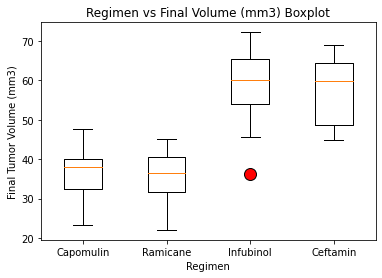

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_props = {"marker" : "o", "markerfacecolor" : "red", "markersize" : 12, "markeredgecolor" : 'black'}

regimen_boxplot = plt.boxplot(regimen_tumor_df, labels = treatments_list, flierprops = outlier_props)

plt.xlabel("Regimen")

plt.ylabel("Final Tumor Volume (mm3)")

plt.title("Regimen vs Final Volume (mm3) Boxplot")

plt.show()

## Line and Scatter Plots

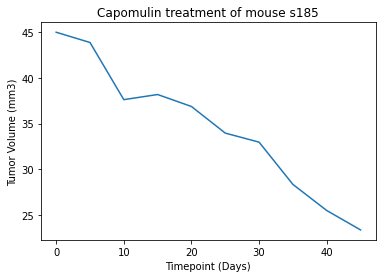

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse_df = mouse_study_results[mouse_study_results["Drug Regimen"] == "Capomulin"]
s185_mouse_df = capo_mouse_df[capo_mouse_df["Mouse ID"] == "s185"]
s185_mouse_df

plt.plot(s185_mouse_df["Timepoint"], s185_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")
plt.show()

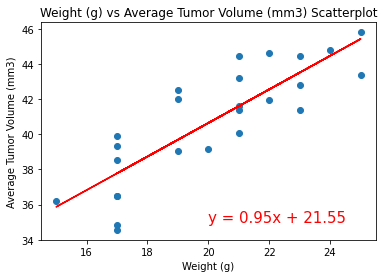

The correlation between Weight (g) and Tumor Volume (mm3) is 0.8419363424694721.
The r-squared is: 0.7088568047708723


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mouse_df.groupby("Mouse ID").mean()
plt.scatter(capo_mouse_df.groupby("Mouse ID").mean()["Weight (g)"],\
            capo_mouse_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight (g) vs Average Tumor Volume (mm3) Scatterplot")

## Correlation and Regression

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_mouse_df.groupby("Mouse ID").mean()["Weight (g)"],\
                         capo_mouse_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"])

# Code template below taken from ..\ClassRepo\UofM-VIRT-DATA-PT-06-2022-U-LOLC\01-Lesson-Plans\
# 05-Matplotlib\3\Activities\08-Ins_Fits_and_Regression\Solved\regression.ipynb

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_mouse_df.groupby("Mouse ID").mean()["Weight (g)"],\
                                                      capo_mouse_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"])
regress_values = capo_mouse_df.groupby("Mouse ID").mean()["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(capo_mouse_df.groupby("Mouse ID").mean()["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq, (20.0, 35.0), color = "red", fontsize = 15)
plt.show()
print(f"The correlation between Weight (g) and Tumor Volume (mm3) is {correlation[0]}.")
print(f"The r-squared is: {rvalue ** 2}")